In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

@jit
def solvepoisson(Vb,nrep):
    
    V = np.copy(Vb)
    for i in range(len(V.flat)):
        if (np.isnan(Vb.flat[i])):
            V.flat[i] = 0.0
    Vnew = np.copy(V)
    Lx = Vb.shape[0]
    Ly = Vb.shape[1]
    for n in range(nrep):
        for ix in range(Lx):
            for iy in range(Ly):
                pot = 0.0
                if (np.isnan(Vb[ix,iy])):
                    ix1 = ix+1
                    if (ix1>Lx-1):
                        ix1 = 0
                    pot = pot + V[ix1,iy]
                    ix1 = ix-1
                    if (ix1<0):
                        ix1 = Lx-1
                    pot = pot + V[ix1,iy]
                    iy1 = iy+1
                    if (iy1>Ly-1):
                        iy1 = 0
                    pot = pot + V[ix,iy1]
                    iy1 = iy-1
                    if (iy1<0):
                        iy1 = Ly-1
                    pot = pot + V[ix,iy1]
                    Vnew[ix,iy] = pot/4.0
                else:
                    Vnew[ix,iy] = V[ix,iy]
        V, Vnew = Vnew, V
    return V

In [2]:
Lx = 100
Ly = 100
Vb = np.zeros((Lx,Ly),float)
c = np.copy(Vb)
Vb[:] = np.float('nan')

# Toppen
Vb[:,Ly-1] = 0.0

# Bunnen
Vb[:,0] = 1.0

C:\Users\BE1501~1\AppData\Local\Temp/ipykernel_43032/2944741692.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Vb[:] = np.float('nan')


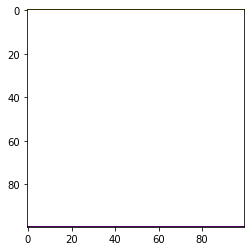

In [3]:
%matplotlib inline
plt.imshow(Vb.T)

In [4]:
nrep = 10000
V = solvepoisson(Vb,nrep)

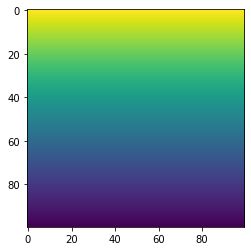

In [5]:
%matplotlib inline
plt.imshow(V.T)

In [6]:
zeroneighbor = np.copy(Vb)
zeroneighbor[:] = 0.0
zeroneighbor[:,Ly-2] = np.float('nan')

C:\Users\BE1501~1\AppData\Local\Temp/ipykernel_43032/2726832654.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  zeroneighbor[:,Ly-2] = np.float('nan')


<IPython.core.display.Javascript object>


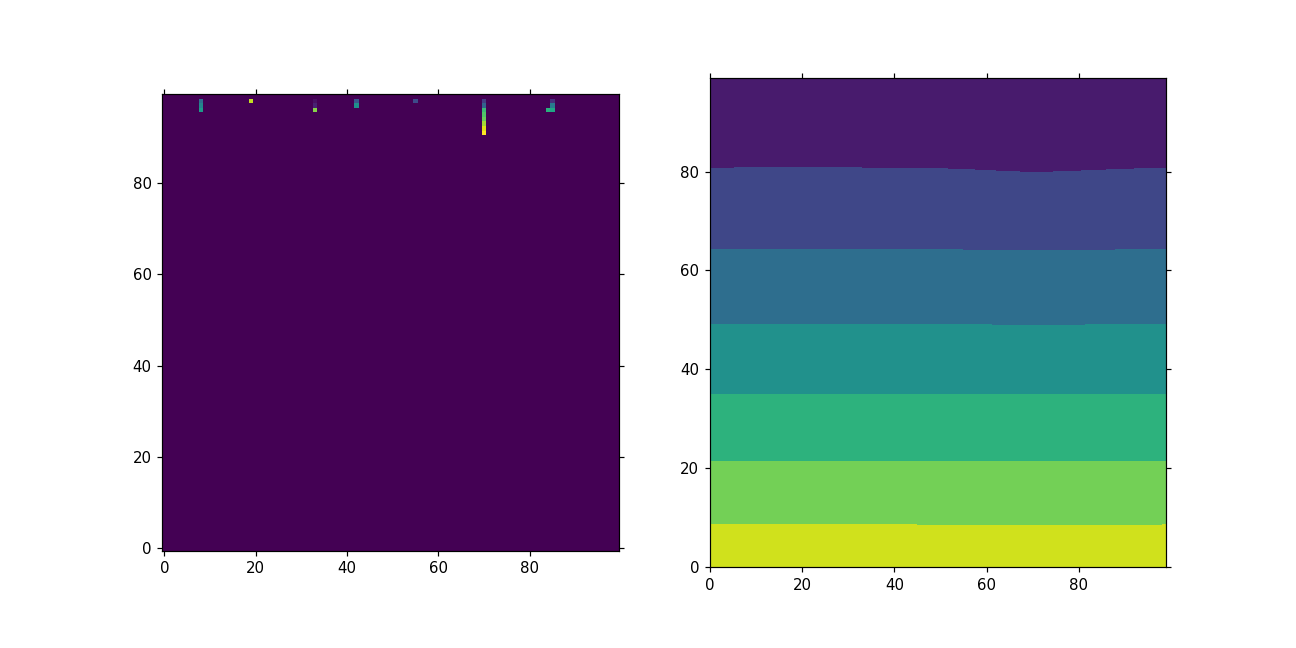

C:\Users\BE1501~1\AppData\Local\Temp/ipykernel_43032/2135307645.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (ix>0): zeroneighbor[ix-1,iy]=np.float('nan')
C:\Users\BE1501~1\AppData\Local\Temp/ipykernel_43032/2135307645.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (ix<Lx-1): zeroneighbor[ix+1,iy]=np.float('nan')
C:\Us

KeyboardInterrupt: 

In [7]:
nrep = 10000
zexp = 0.25
ymin = Ly-1
ns = 0

# Dynamic visualization
%matplotlib notebook
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#

while (ymin>0):
    V = solvepoisson(Vb,nrep)
    prob = V**zexp
    prob = prob*np.random.uniform(0,1,(Lx,Ly))
    prob = prob*np.isnan(zeroneighbor)
    [ix,iy] = np.unravel_index(np.argmax(prob,axis=None),prob.shape)
    Vb[ix,iy] = 0.0
    if (ix>0): zeroneighbor[ix-1,iy]=np.float('nan')
    if (ix<Lx-1): zeroneighbor[ix+1,iy]=np.float('nan')
    if (iy>0): zeroneighbor[ix,iy-1]=np.float('nan')
    if (iy<Ly-1): zeroneighbor[ix,iy-1]=np.float('nan')
    ns = ns + 1
    c[ix,iy] = ns
    if (iy<ymin):
        ymin = iy
    # Visualize result
    ax1.clear()
    ax1.imshow(c.T)
    ax1.invert_yaxis()
    ax2.clear()
    ax2.contourf(V.T)
    fig.canvas.draw()
